In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DSF/Proj/'DSF Project Fall 2021'/data/
# %cd /content/drive/MyDrive/DSF Project Fall 2021/data

/content/drive/.shortcut-targets-by-id/1uITAlwG_KLn52Rc6b51jPmC6XmnWK3r-/DSF Project Fall 2021/data


In [ ]:
pip install pulp

     |████████████████████████████████| 41.2 MB 1.3 MB/s 


In [ ]:
pip install colorama

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import permutation_test_score as perm_test
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median', add_indicator=True)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDClassifier
import requests
import pulp
from IPython.display import display, Markdown, Latex
from colorama import Fore, Style

In [ ]:
main_data = pd.read_csv("cleaned_merged_seasons.csv")
data = main_data.copy()
players =data['name'].unique()

print(type(data))

<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:

merged_gw_21_22 = pd.read_csv("merged_season_2021-22.csv")

x= data[(data['minutes']>0)]
y =x.groupby(['name','season_x']).sum().reset_index()
y.sort_values(['goals_scored'],ascending=False)

In [ ]:
final_decisions_df2 = pd.read_pickle('final_decisions_df.pkl')
data = final_decisions_df2.copy()

xyz = pd.read_pickle('ashley_nov29.pkl')
data1 = xyz.copy()

In [ ]:
data1

,name,assists,goals_scored,goals_conceded,ict_index,influence,creativity,threat,value,saves,minutes,penalties_saved,bonus,yellow_cards,red_cards,clean_sheets,bps,position,total_points,predicted_score_rf,team,GW
0,Adrián San Miguel del Castillo,0.000000,0.000000,2.092501,0.000,0.000,0.000,0.00,45.0,2.601501,78.447533,0.000000,0.0,1.0,0.0,0.0,12.0,GK,0.0,1.278333,Liverpool,1.0
1,David de Gea,0.000000,0.000000,1.008346,1.300,13.200,0.000,0.00,50.0,2.128800,80.005715,0.000000,1.0,0.0,0.0,1.0,16.0,GK,2.0,5.460000,Man Utd,1.0
2,Fraser Forster,0.000000,0.000000,1.205943,0.000,0.000,0.000,0.00,45.0,1.968972,68.200692,0.076339,0.0,0.0,0.0,0.0,4.5,GK,0.0,2.686667,Southampton,1.0
3,Hugo Lloris,0.000000,0.000000,1.098763,3.200,31.800,0.000,0.00,55.0,3.154852,89.006861,0.017579,0.0,0.0,0.0,1.0,3.0,GK,10.0,4.853333,Spurs,1.0
4,Kasper Schmeichel,0.000000,0.000000,1.264840,2.600,26.000,0.000,0.00,50.0,2.440746,89.961197,0.015237,0.0,0.0,0.0,0.0,6.0,GK,9.0,2.730000,Leicester,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Tammy Abraham,0.065126,0.178042,0.392689,0.000,0.000,0.000,0.00,65.0,0.000000,29.610266,0.000000,0.0,0.0,0.0,0.0,0.0,FWD,0.0,1.000000,Chelsea,12.0
570,Teemu Pukki,0.000000,0.070000,0.700000,2.622,4.958,4.012,17.28,58.0,0.000000,59.000000,0.000000,0.0,0.0,0.0,0.0,9.4,FWD,8.0,1.000000,Norwich,12.0
576,Timo Werner,0.131092,0.135546,0.386807,3.916,4.126,8.873,26.21,86.0,0.000000,40.981513,0.000000,0.0,0.0,0.0,0.0,5.8,FWD,0.0,1.000000,Chelsea,12.0
589,Troy Deeney,0.000000,0.000000,0.000000,0.130,1.300,0.195,0.00,54.0,0.000000,29.250000,0.000000,0.0,0.0,0.0,0.0,0.0,FWD,0.0,1.000000,Watford,12.0


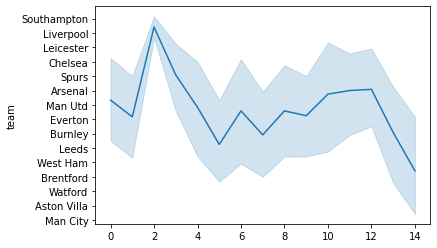

In [ ]:
sns.lineplot(data=data['team'])

In [ ]:
x = data[data.name.str.contains('Salah')]
x

,GW,captain,cost,expected_score,name,non_sub,position,real_score,sub,team
3,1.0,1.0,12.5,7.500000,Mohamed Salah,1.0,MID,17.0,0.0,Liverpool
2,2.0,0.0,12.6,13.350000,Mohamed Salah,1.0,MID,3.0,0.0,Liverpool
3,3.0,0.0,12.6,7.538512,Mohamed Salah,1.0,MID,10.0,0.0,Liverpool
2,4.0,1.0,12.5,10.684722,Mohamed Salah,1.0,MID,8.0,0.0,Liverpool
3,5.0,0.0,12.5,7.871846,Mohamed Salah,1.0,MID,12.0,0.0,Liverpool
2,6.0,0.0,12.6,8.032957,Mohamed Salah,1.0,MID,7.0,0.0,Liverpool
2,7.0,1.0,12.6,10.351389,Mohamed Salah,1.0,MID,13.0,0.0,Liverpool
3,8.0,1.0,12.7,10.918056,Mohamed Salah,1.0,MID,13.0,0.0,Liverpool
3,9.0,0.0,12.8,8.823773,Mohamed Salah,1.0,MID,24.0,0.0,Liverpool
2,10.0,1.0,12.9,12.924747,Mohamed Salah,1.0,MID,5.0,0.0,Liverpool


Text(0, 0.5, 'Scores')

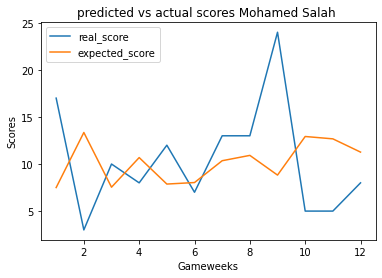

In [ ]:
ax = plt.gca() 
x = data[data.name.str.contains('Salah')]
x.plot(x ='GW', y = 'real_score',ax=ax)
x.plot(x ='GW', y = 'expected_score',ax=ax)
plt.title('predicted vs actual scores Mohamed Salah ')
plt.xlabel('Gameweeks')
plt.ylabel('Scores')

Text(0, 0.5, 'Scores')

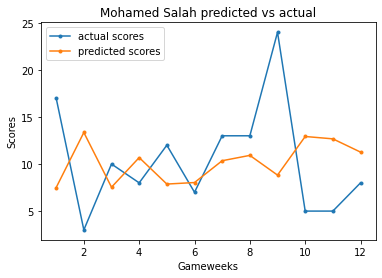

In [ ]:
ax = plt.gca() 
x = data[data.name.str.contains('Salah')]
x.plot(x ='GW', y = 'real_score', ax=ax,marker='.', label='actual scores')
x.plot(x ='GW', y = 'expected_score',ax=ax,marker='.',label='predicted scores')
plt.title('Mohamed Salah predicted vs actual')
plt.xlabel('Gameweeks')
plt.ylabel('Scores')

In [ ]:
teamss = ['Liverpool', 'Man City', 'Man Utd' ]
x = data
x = x[(x.GW == 1)]
# x = x[x.position == 'MID']
data_x = x.groupby(['team','GW']).count().reset_index()
data_x

,team,GW,captain,cost,expected_score,name,non_sub,position,real_score,sub
0,Arsenal,1.0,1,1,1,1,1,1,1,1
1,Brighton,1.0,1,1,1,1,1,1,1,1
2,Burnley,1.0,1,1,1,1,1,1,1,1
3,Chelsea,1.0,1,1,1,1,1,1,1,1
4,Crystal Palace,1.0,1,1,1,1,1,1,1,1
5,Everton,1.0,1,1,1,1,1,1,1,1
6,Leicester,1.0,3,3,3,3,3,3,3,3
7,Liverpool,1.0,2,2,2,2,2,2,2,2
8,Man Utd,1.0,1,1,1,1,1,1,1,1
9,Southampton,1.0,2,2,2,2,2,2,2,2


11


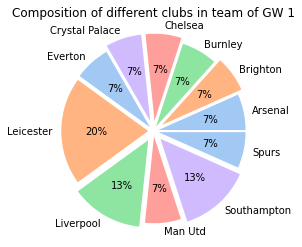

In [ ]:
labels = data_x['team'].values
print(len(data_x['position'].values))
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
explode = (0.06,0.12,0.06,0.12,0.12,0.06,0.06,0.12,0.06,0.12,0.06)
plt.pie( x =data_x['position'].values,labels = list(labels),explode=explode, colors = colors, autopct='%.0f%%')
plt.title('Composition of different clubs in team of GW 1')
plt.show()

In [ ]:



data

,GW,captain,cost,expected_score,name,non_sub,position,real_score,sub,team
0,1.0,0.0,4.5,5.460000,Robert Sánchez,1.0,GK,2.0,0.0,Brighton
1,1.0,0.0,4.5,3.613988,Cheikhou Kouyaté,1.0,DEF,1.0,0.0,Crystal Palace
2,1.0,0.0,4.5,3.997563,Oriol Romeu Vidal,1.0,MID,2.0,0.0,Southampton
3,1.0,1.0,12.5,7.500000,Mohamed Salah,1.0,MID,17.0,0.0,Liverpool
4,1.0,0.0,7.0,4.940581,Harvey Barnes,1.0,MID,3.0,0.0,Leicester
...,...,...,...,...,...,...,...,...,...,...
10,12.0,0.0,5.8,4.333333,Hee-Chan Hwang,1.0,FWD,2.0,0.0,Wolves
11,12.0,0.0,4.9,4.853333,Illan Meslier,0.0,GK,1.0,1.0,Leeds
12,12.0,0.0,4.9,3.500000,Çaglar Söyüncü,0.0,DEF,1.0,1.0,Leicester
13,12.0,0.0,8.2,2.909225,Michail Antonio,0.0,FWD,2.0,1.0,West Ham


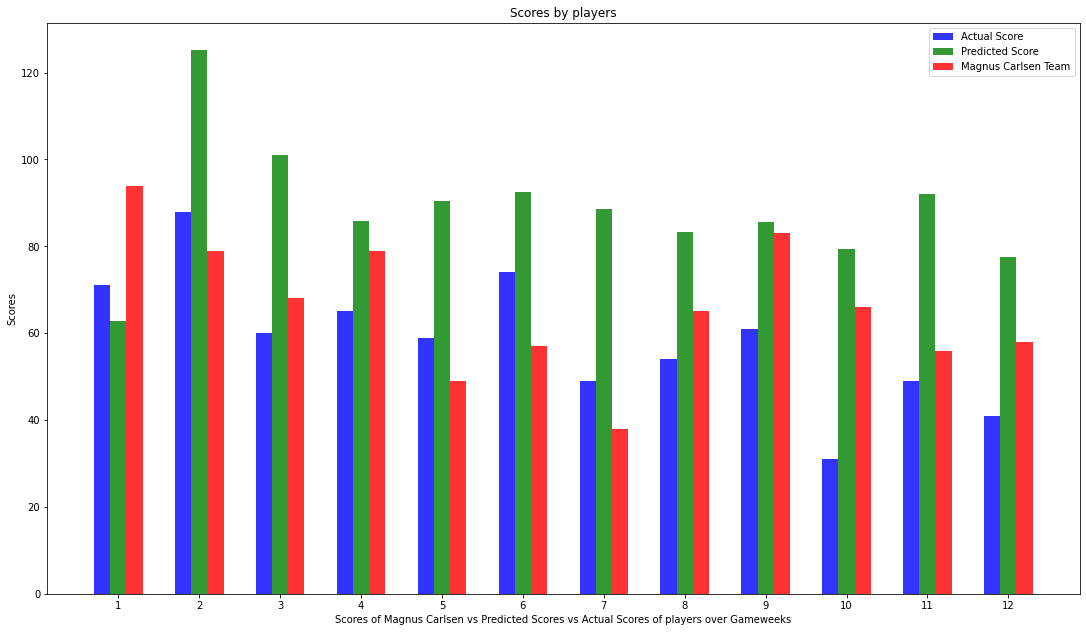

In [ ]:

final_decisions_df = data

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)
index = np.arange(12)
bar_width = 0.20
opacity = 0.8

magnus = [94,79,68,79,49,57,38,65,83,66,56,58]
r_sum = []
for i in range(1,13):
  gw_data = final_decisions_df[final_decisions_df.GW == i]
  r_sum.append(sum(gw_data['real_score']))

t_sum = []
for i in range(1,13):
  gw_data = final_decisions_df[final_decisions_df.GW == i]
  t_sum.append(sum(gw_data['expected_score']))

rects1 = plt.bar(index, r_sum, bar_width,
alpha=opacity,
color='b',
label='Actual Score')

rects2 = plt.bar(index + bar_width, t_sum, bar_width,
alpha=opacity,
color='g',
label='Predicted Score')

rects3 = plt.bar(index + (bar_width*2), magnus, bar_width,
alpha=opacity,
color='r',
label='Magnus Carlsen Team')

plt.xlabel('Scores of Magnus Carlsen vs Predicted Scores vs Actual Scores of players over Gameweeks')
plt.ylabel('Scores')
plt.title('Scores by players')
plt.xticks(index + bar_width, (1,2,3,4,5,6,7,8,9,10,11,12))
plt.legend()

# plt.tight_layout()
plt.show()

In [ ]:
data2 = merged_gw_21_22.copy()


In [ ]:


x = data2.groupby(['team']).sum().reset_index()
x


,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Arsenal,638.2,9,36,2134,56,1858.5,58873,24740,187,13,636.5,2440.0,11796,3888,0,2,0,1,2797,39,58463924,320,743,2069.0,488,537138,7112523,6575385,21704,214,18,2797
1,Aston Villa,462.1,15,37,2046,46,1440.8,58490,23059,220,15,560.6,2348.6,11810,4471,1,0,1,1,2550,33,71861645,421,736,1816.0,492,-4559772,4224483,8784255,19803,192,28,2550
2,Brentford,370.6,13,32,1961,36,1464.5,75339,21931,187,15,589.5,2345.8,11820,3468,0,0,0,1,2425,34,51285934,557,461,2083.0,480,1077828,6163150,5085322,17521,181,20,2425
3,Brighton,466.5,11,45,2208,44,1728.1,85675,23358,154,12,593.7,2480.4,11850,3453,0,0,0,1,2618,28,73226850,459,395,1736.0,476,1121721,6242591,5120870,19262,197,31,2618
4,Burnley,167.1,14,23,1773,13,1495.5,73624,20653,220,13,564.8,2520.8,11853,2889,0,0,0,0,2246,38,18355937,396,568,1644.0,389,-402456,1497919,1900375,16349,168,28,2246
5,Chelsea,946.0,26,61,2951,87,2199.1,73348,21230,44,29,802.2,3274.0,11807,3328,0,0,0,1,2327,33,131070782,476,532,2550.0,800,2317479,18807552,16490073,21404,178,13,2327
6,Crystal Palace,455.8,15,42,2277,47,1591.8,103193,21177,187,18,603.0,2666.2,11849,3587,0,0,0,0,2330,37,30957303,388,649,1775.0,528,2657346,5238649,2580747,17397,178,22,2330
7,Everton,537.1,15,38,2041,33,1766.4,130877,25242,209,16,643.2,2666.8,11857,5108,1,0,0,1,2721,32,69840905,455,684,2003.0,475,-644102,8567167,9211269,20345,198,21,2721
8,Leeds,368.4,10,27,1826,11,1789.9,117855,23621,220,12,626.1,2495.2,11827,5104,1,0,0,1,2482,40,56257929,449,492,1982.0,371,-2456054,4878959,7335013,18051,184,28,2482
9,Leicester,414.3,12,37,2044,12,1400.3,90705,20112,231,16,591.8,2732.6,11801,3127,1,0,0,1,2175,43,87179781,528,493,1789.0,412,-2304296,6669245,8973541,17970,166,17,2175


In [ ]:
player_names = ['Gea', 'Chilwell', 'Vardy','Fernandes','Salah','Arnold','Cancelo', 'Livramento', 'Antonio','Ronaldo']
correct_names = []
merged_gw_2122 = merged_gw_21_22.copy()
for p in player_names:
  if len(merged_gw_2122[merged_gw_2122['name'].str.contains(p)].index) > 0:
    correct_name = merged_gw_2122[merged_gw_2122['name'].str.contains(p)].values[0][0]
    correct_names.append(correct_name)

print(correct_names)

['David de Gea', 'Benjamin Chilwell', 'Jamie Vardy', 'Bruno Miguel Borges Fernandes', 'Mohamed Salah', 'Trent Alexander-Arnold', 'João Pedro Cavaco Cancelo', 'Tino Livramento', 'Antonio Rüdiger', 'Cristiano Ronaldo dos Santos Aveiro']


In [ ]:

top_teams = ['Arsenal','Liverpool','Man City','Man Utd','Chelsea','West Ham','Wolves','Brighton','Leicester','Spurs']

In [ ]:
merged_gw_2122_fewplayers = data2.groupby(['GW','team']).mean().reset_index()
merged_gw_2122_fewplayers = merged_gw_2122_fewplayers[merged_gw_2122_fewplayers['team'].isin(top_teams) ]


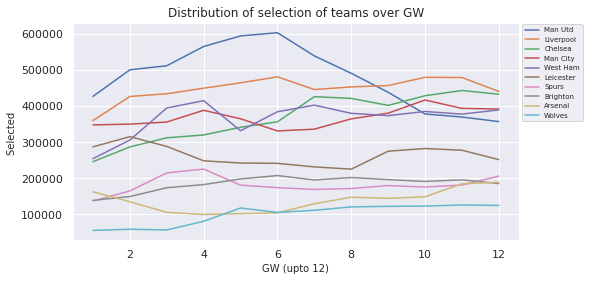

In [ ]:

sns.set(rc = {'figure.figsize':(8,4)})
# sns.lineplot(data=merged_gw_2122_fewplayers, x="GW", y="selected", hue="name")
fig, ax1 = plt.subplots(1,1)
d_temp = merged_gw_2122_fewplayers.sort_values(['selected'],ascending=False)
g = sns.lineplot(data=d_temp, x="GW", y="selected", hue="team")
box = g.get_position()
g.set(title='Distribution of selection of teams over GW')
g.set_position([box.x0, box.y0, box.width, box.height])
g.legend(loc='center right', bbox_to_anchor=(1.15, 0.77), ncol=1,prop={'size': 7})
g.set_xlabel("GW (upto 12)", fontsize = 10)
g.set_ylabel("Selected ", fontsize = 10)
plt.show()

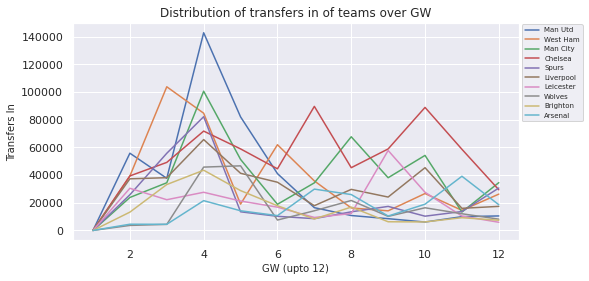

In [ ]:
sns.set(rc = {'figure.figsize':(8,4)})
# sns.lineplot(data=merged_gw_2122_fewplayers, x="GW", y="selected", hue="name")
fig, ax1 = plt.subplots(1,1)
d_temp = merged_gw_2122_fewplayers.sort_values(['transfers_in'],ascending=False)
g = sns.lineplot(data=d_temp, x="GW", y="transfers_in", hue="team")
box = g.get_position()
g.set(title='Distribution of transfers in of teams over GW')
g.set_position([box.x0, box.y0, box.width, box.height])
g.legend(loc='center right', bbox_to_anchor=(1.15, 0.77), ncol=1,prop={'size': 7})
g.set_xlabel("GW (upto 12)", fontsize = 10)
g.set_ylabel("Transfers In", fontsize = 10)
plt.show()

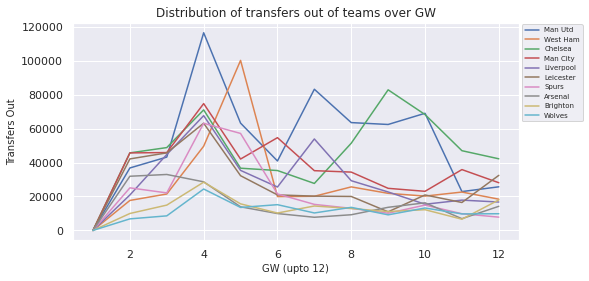

In [ ]:
sns.set(rc = {'figure.figsize':(8,4)})
# sns.lineplot(data=merged_gw_2122_fewplayers, x="GW", y="selected", hue="name")
fig, ax1 = plt.subplots(1,1)
d_temp = merged_gw_2122_fewplayers.sort_values(['transfers_out'],ascending=False)
g = sns.lineplot(data=d_temp, x="GW", y="transfers_out", hue="team")
box = g.get_position()
g.set(title='Distribution of transfers out of teams over GW')
g.set_position([box.x0, box.y0, box.width, box.height])
g.legend(loc='center right', bbox_to_anchor=(1.15, 0.77), ncol=1,prop={'size': 7})
g.set_xlabel("GW (upto 12)", fontsize = 10)
g.set_ylabel("Transfers Out", fontsize = 10)
plt.show()

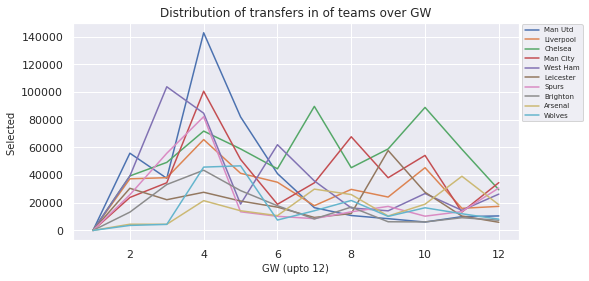

In [ ]:
sns.set(rc = {'figure.figsize':(8,4)})
# sns.lineplot(data=merged_gw_2122_fewplayers, x="GW", y="selected", hue="name")
fig, ax1 = plt.subplots(1,1)
d_temp = merged_gw_2122_fewplayers.sort_values(['selected'],ascending=False)
g = sns.lineplot(data=d_temp, x="GW", y="transfers_in", hue="team")
box = g.get_position()
g.set(title='Distribution of transfers in of teams over GW')
g.set_position([box.x0, box.y0, box.width, box.height])
g.legend(loc='center right', bbox_to_anchor=(1.15, 0.77), ncol=1,prop={'size': 7})
g.set_xlabel("GW (upto 12)", fontsize = 10)
g.set_ylabel("Selected ", fontsize = 10)
plt.show()

([<matplotlib.axis.XTick at 0x7f019dcff810>,
 [Text(0, 0, 'Arsenal'),
  Text(0, 0, 'Aston Villa'),
  Text(0, 0, 'Brentford'),
  Text(0, 0, 'Brighton'),
  Text(0, 0, 'Burnley'),
  Text(0, 0, 'Chelsea'),
  Text(0, 0, 'Crystal Palace'),
  Text(0, 0, 'Everton'),
  Text(0, 0, 'Leeds'),
  Text(0, 0, 'Leicester'),
  Text(0, 0, 'Liverpool'),
  Text(0, 0, 'Man City'),
  Text(0, 0, 'Man Utd'),
  Text(0, 0, 'Newcastle'),
  Text(0, 0, 'Norwich'),
  Text(0, 0, 'Southampton'),
  Text(0, 0, 'Spurs'),
  Text(0, 0, 'Watford'),
  Text(0, 0, 'West Ham'),
  Text(0, 0, 'Wolves')])

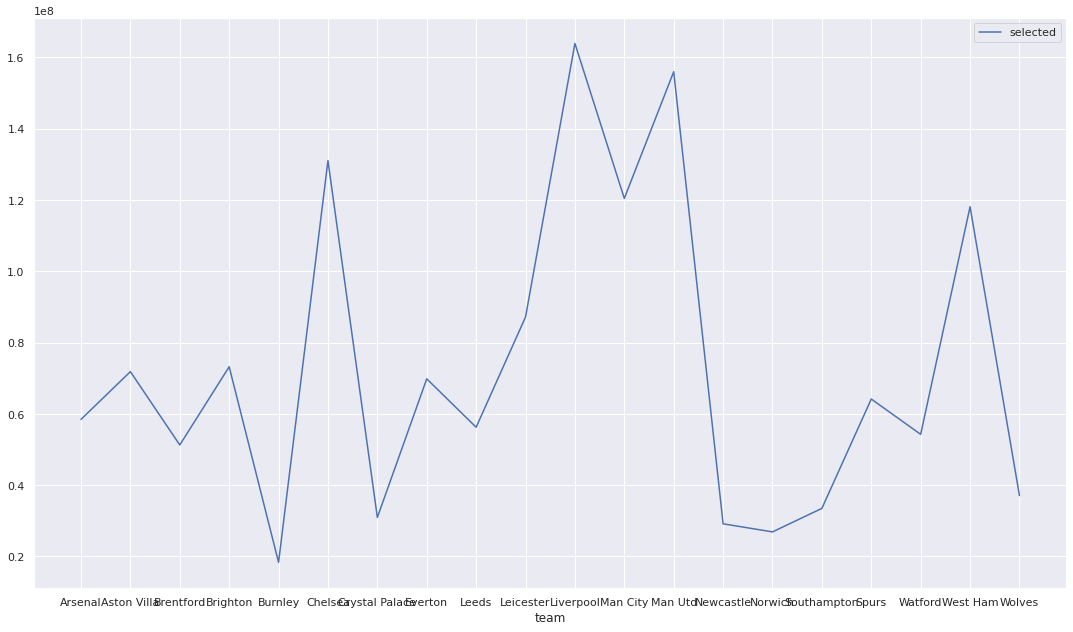

In [ ]:
merged_gw_21_22 = pd.read_csv("merged_season_2021-22.csv")
x['selected']/=1000

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

x = data2.groupby(['team']).sum().reset_index()
x.plot(x='team',y ='selected',ax=ax)
plt.xticks(np.arange(20),('Arsenal', 'Aston Villa', 'Brentford', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Man Utd', 'Newcastle', 'Norwich',
       'Southampton', 'Spurs', 'Watford', 'West Ham', 'Wolves'))


Text(0, 0.5, 'Scores')

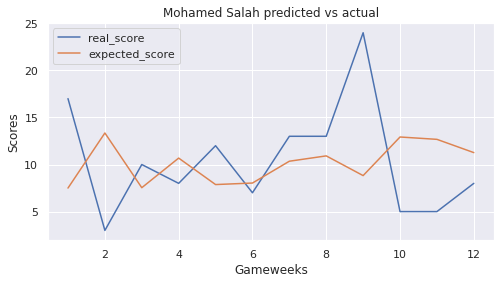

In [ ]:
ax = plt.gca() 
x = data[data.name.str.contains('Salah')]
x.plot(x ='GW', y = 'real_score',ax=ax)
x.plot(x ='GW', y = 'expected_score',ax=ax)
plt.title('Mohamed Salah predicted vs actual')
plt.xlabel('Gameweeks')
plt.ylabel('Scores')

In [ ]:
points_pp_mean['value'] 

0      53.666667
1      55.000000
2      49.900000
3      45.727273
4      45.000000
         ...    
625    64.666667
626    45.416667
627    45.000000
628    45.000000
629    49.583333
Name: value, Length: 630, dtype: float64

In [ ]:
points_pp_sum[points_pp_sum.name.str.contains('Salah')]

,name,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
438,Mohamed Salah,127.5,8,16,387,7,373.6,2796,729,11,11,183.3,603.2,1080,113,0,0,0,0,78,0,59503396,26,20,855.0,125,1670676,2472550,801874,1522,6,1,78


In [ ]:



dataScatter = merged_gw_21_22.copy()
points_pp_mean = dataScatter.groupby(['name']).mean().reset_index()
points_pp_mean.sort_values(['name'])

points_pp_sum = dataScatter.groupby(['name']).sum().reset_index()
points_pp_sum.sort_values(['name'])

points_pp_final =  pd.DataFrame()
points_pp_final['name'] = points_pp_mean['name']
points_pp_final['points_per_million'] = (points_pp_sum['total_points'] / (points_pp_mean['value'] ))*10 
points_pp_final['points_per_game'] = points_pp_sum['total_points'] /12
points_pp_final = points_pp_final[points_pp_final['points_per_game']>0.9]
points_pp_final = points_pp_final.sort_values(['points_per_million'])
# points_pp_final = points_pp_final[((points_pp_final['points_per_million'] > 4) & (points_pp_final['points_per_million'] < 7))]
points_pp_final.head(30)

,name,points_per_million,points_per_game
165,Edinson Cavani,1.424332,1.000000
215,Hakim Ziyech,1.493213,0.916667
253,Jadon Sancho,1.537054,1.166667
46,Anthony Martial,1.560130,1.000000
491,Patson Daka,1.668598,1.000000
24,Alexandre Lacazette,1.674975,1.166667
396,Marcus Rashford,1.699115,1.333333
15,Ademola Lookman,1.833333,0.916667
108,Christian Pulisic,1.894737,1.250000
543,Salomón Rondón,2.000000,1.000000


In [ ]:
ax = gk_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="goalkeepers: total_points v cost")
for i, txt in enumerate(gk_df.web_name):
    ax.annotate(txt, (gk_df.now_cost.iat[i],gk_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

In [ ]:
for i, txt in enumerate(gk_df.web_name):
    ax.annotate(txt, (gk_df.now_cost.iat[i],gk_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

In [ ]:
points_pp_final

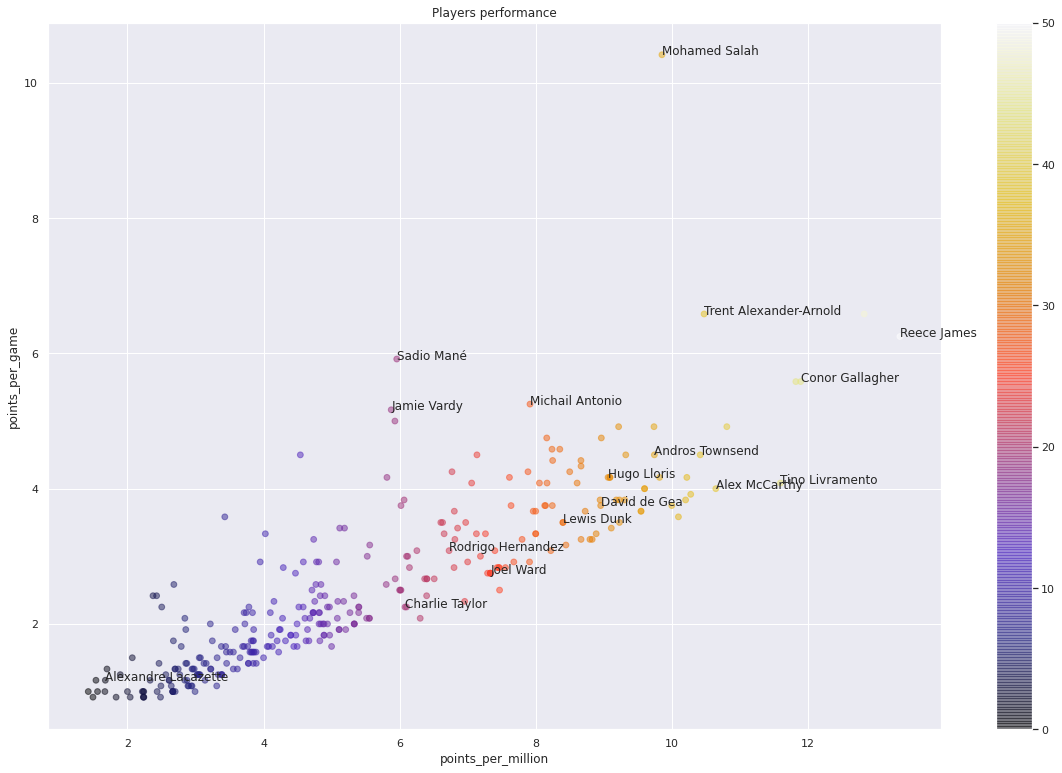

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a, b = 0, 50
x, y = points_pp_final['points_per_million'].min(), points_pp_final['points_per_million'].max()
colors = (points_pp_final['points_per_million'] - x) / (y - x) * (b - a) + a

x = points_pp_final['points_per_million']
y = points_pp_final['points_per_game'] 


ax = points_pp_final.plot.scatter(x='points_per_million',y='points_per_game', c=colors, s=34 ,alpha=.5, figsize=(20,13), title="Players performance",cmap='CMRmap',sharex=False)
plt.xlabel("points_per_million")

plt.ylabel("points_per_game")
cnt = []
for i in range(300,307,2):
  cnt.append(i)

for i in range(200,300,15):
  cnt.append(i)

# cnt.append(75)
cnt.append(5)
for i, txt in enumerate(points_pp_final.name):

    if i in cnt or (txt in ['Mohamed Salah','Sadio Mané','Trent Alexander-Arnold', 'Jamie Vardy' ,  'David de Gea']) :
      ax.annotate(txt, (points_pp_final.points_per_million.iat[i],points_pp_final.points_per_game.iat[i]))
# plt.grid(which='both', axis='both', ls='-')

plt.show()

# plt.scatter(x, y,c=colors, cmap='viridis',ax=ax)
# ax.set_xlabel("points_per_million")

# ax.set_ylabel("points_per_game")

# plt.colorbar()

# plt.show() 

In [ ]:
tr